In [1]:
cd ~/DATA/Sentinel/

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

In [9]:
data = parallel_rw_pkl(None, 'Zinder0403_atm', 'r')

In [10]:
data

[[7001,
  9026,
  (array([  1.45465657e-03,   2.15391963e+00,   3.03757928e-02]),
   0.016095773314733525,
   36,
   89,
   0)],
 [7001,
  9073,
  (array([  1.61997394e-05,   2.16316226e+00,   3.01946063e-02]),
   0.018527622345191647,
   47,
   100,
   0)],
 [7001,
  9119,
  (array([  1.45465657e-03,   2.15391963e+00,   3.03757928e-02]),
   0.020087333025395199,
   36,
   85,
   0)],
 [7001,
  9165,
  (array([  1.24246451e-03,   2.15462576e+00,   3.04376690e-02]),
   0.018699760695446127,
   38,
   86,
   0)],
 [7001,
  9212,
  (array([  1.19090811e-03,   2.15580522e+00,   3.03867216e-02]),
   0.016455483994937126,
   39,
   90,
   0)],
 [7001,
  9258,
  (array([  1.45465657e-03,   2.15391963e+00,   3.03757928e-02]),
   0.017185194675140708,
   35,
   83,
   0)],
 [7001,
  9305,
  (array([  1.45465657e-03,   2.15391963e+00,   3.03757928e-02]),
   0.018821609725904187,
   36,
   85,
   0)],
 [7001,
  9351,
  (array([  1.11234842e-03,   2.15538948e+00,   3.04166041e-02]),
   0.020109182

In [12]:
lat, lon = 13.77694,8.99
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx,imgy

(7693, 9892)

In [58]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-7001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]

In [59]:
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, verbose=True, isrobust=True)

tol 1.0 nit 0
tol 2.34121637295 nit 1
tol 2.10147759029 nit 2
tol 1.9961763528 nit 3
tol 1.45631158425 nit 4
tol 1.1533579904 nit 5
tol 0.773725064859 nit 6
tol 0.554788653371 nit 7
tol 0.384787609421 nit 8
tol 0.270771184093 nit 9
tol 0.198520696181 nit 10
tol 0.14209564987 nit 11
tol 0.111485702213 nit 12
tol 0.0838308911137 nit 13
tol 0.0711136236812 nit 14
tol 0.0576404183392 nit 15
tol 0.0522063168699 nit 16
tol 0.0454067638021 nit 17
tol 0.0426487376208 nit 18
tol 0.0388540266642 nit 19
tol 0.037056226327 nit 20
tol 0.0346514177998 nit 21
tol 0.0332603954222 nit 22
tol 0.0315633781194 nit 23
tol 0.0304057935596 nit 24
tol 0.0291150764074 nit 25
tol 0.0281272023901 nit 26
tol 0.0270958160317 nit 27
tol 0.0262442840337 nit 28
tol 0.0253921081559 nit 29
tol 0.0246530537663 nit 30
tol 0.0239318255967 nit 31
tol 0.0232858905429 nit 32
tol 0.02266417784 nit 33
tol 0.0220953186042 nit 34
tol 0.0215514405655 nit 35
tol 0.0210464644092 nit 36
tol 0.0205648283507 nit 37
tol 0.0201130001996

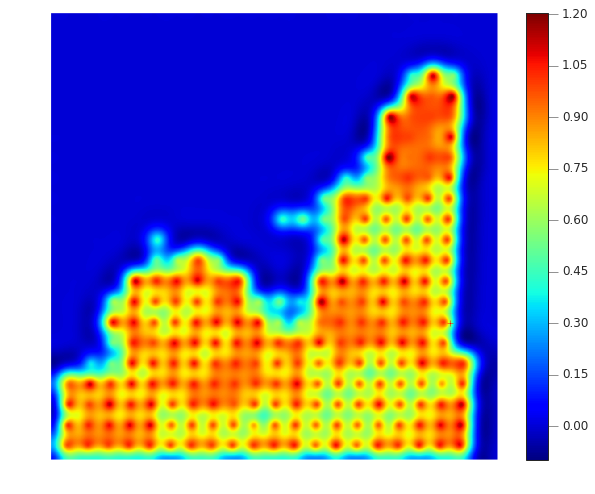

In [60]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(892,693 ,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

In [62]:
(sm_aaro[0]*10)[693, 892]

0.65925444542414535

In [63]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160401_160410_Zinder_Airport.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][11:16]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
11,03:04:2016,09:29:23,94.395405,NaN,0.783637,0.832386,0.899881,NaN,NaN,NaN,NaN,NaN,0.957391,NaN,NaN,0.956656,NaN,0.966592,0.965526,1.215703
12,03:04:2016,10:29:32,94.437176,NaN,0.746437,0.789435,0.855322,NaN,NaN,NaN,NaN,NaN,0.911944,NaN,NaN,0.908292,NaN,0.916752,0.917677,1.256507
13,03:04:2016,12:29:29,94.520475,NaN,0.678286,0.717421,0.779008,NaN,NaN,NaN,NaN,NaN,0.834362,NaN,NaN,0.828848,NaN,0.838770,0.842449,1.182560
14,03:04:2016,15:30:42,94.646319,NaN,0.734959,0.780196,0.841155,NaN,NaN,NaN,NaN,NaN,0.891278,NaN,NaN,0.893011,NaN,0.900353,0.896218,1.221532
15,03:04:2016,16:34:32,94.690648,NaN,0.761890,0.809267,0.867835,NaN,NaN,NaN,NaN,NaN,0.916373,NaN,NaN,0.921028,NaN,0.932595,0.931344,1.267510


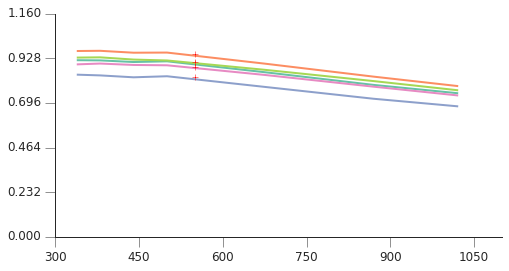

In [64]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [65]:
aot550

[array(0.9498181399300303),
 array(0.9056218900882314),
 array(0.8291056276154736),
 array(0.8835890691791332),
 array(0.9079644825586742)]